In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)



Mounted at /content/drive


In [8]:
path = "/content/drive/MyDrive/praktikum_ml/praktikum04/data/calonpembelimobil.csv"

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix




In [17]:

# Tampilkan informasi dataset
print("Shape dataset:", df.shape)
print("\nInfo dataset:")
print(df.info())
print("\n5 data pertama:")
print(df.head())

Shape dataset: (1000, 7)

Info dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   ID              1000 non-null   int64
 1   Usia            1000 non-null   int64
 2   Status          1000 non-null   int64
 3   Kelamin         1000 non-null   int64
 4   Memiliki_Mobil  1000 non-null   int64
 5   Penghasilan     1000 non-null   int64
 6   Beli_Mobil      1000 non-null   int64
dtypes: int64(7)
memory usage: 54.8 KB
None

5 data pertama:
   ID  Usia  Status  Kelamin  Memiliki_Mobil  Penghasilan  Beli_Mobil
0   1    32       1        0               0          240           1
1   2    49       2        1               1          100           0
2   3    52       1        0               2          250           1
3   4    26       2        1               1          130           0
4   5    45       3        0               2          237

In [19]:
df = pd.read_csv(path)
df.head()

,ID,Usia,Status,Kelamin,Memiliki_Mobil,Penghasilan,Beli_Mobil
0,1,32,1,0,0,240,1
1,2,49,2,1,1,100,0
2,3,52,1,0,2,250,1
3,4,26,2,1,1,130,0
4,5,45,3,0,2,237,1


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   ID              1000 non-null   int64
 1   Usia            1000 non-null   int64
 2   Status          1000 non-null   int64
 3   Kelamin         1000 non-null   int64
 4   Memiliki_Mobil  1000 non-null   int64
 5   Penghasilan     1000 non-null   int64
 6   Beli_Mobil      1000 non-null   int64
dtypes: int64(7)
memory usage: 54.8 KB


In [21]:
df.isnull().sum()

,0
ID,0
Usia,0
Status,0
Kelamin,0
Memiliki_Mobil,0
Penghasilan,0
Beli_Mobil,0



Statistik Deskriptif:
                ID         Usia       Status      Kelamin  Memiliki_Mobil  \
count  1000.000000  1000.000000  1000.000000  1000.000000      1000.00000   
mean    500.500000    43.532000     1.469000     0.481000         0.95200   
std     288.819436    12.672078     1.073402     0.499889         0.80146   
min       1.000000    24.000000     0.000000     0.000000         0.00000   
25%     250.750000    33.000000     1.000000     0.000000         0.00000   
50%     500.500000    43.000000     1.000000     0.000000         1.00000   
75%     750.250000    53.000000     2.000000     1.000000         2.00000   
max    1000.000000   164.000000     3.000000     1.000000         4.00000   

       Penghasilan   Beli_Mobil  
count   1000.00000  1000.000000  
mean     270.09000     0.633000  
std       95.23681     0.482228  
min       95.00000     0.000000  
25%      187.00000     0.000000  
50%      258.50000     1.000000  
75%      352.25000     1.000000  
max      49

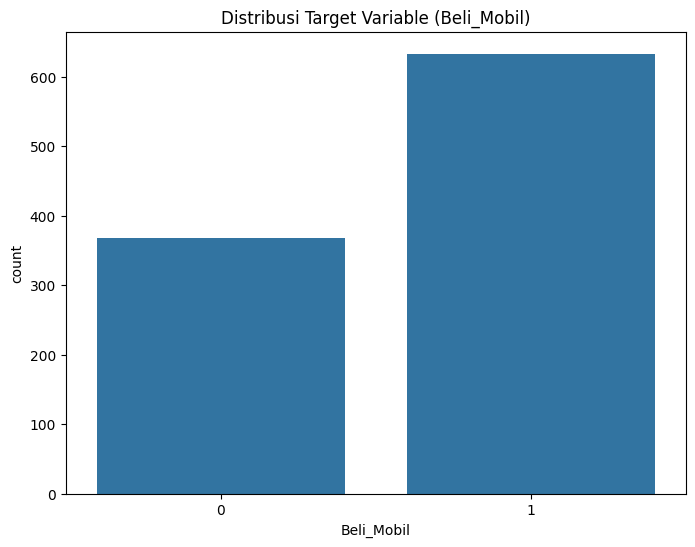

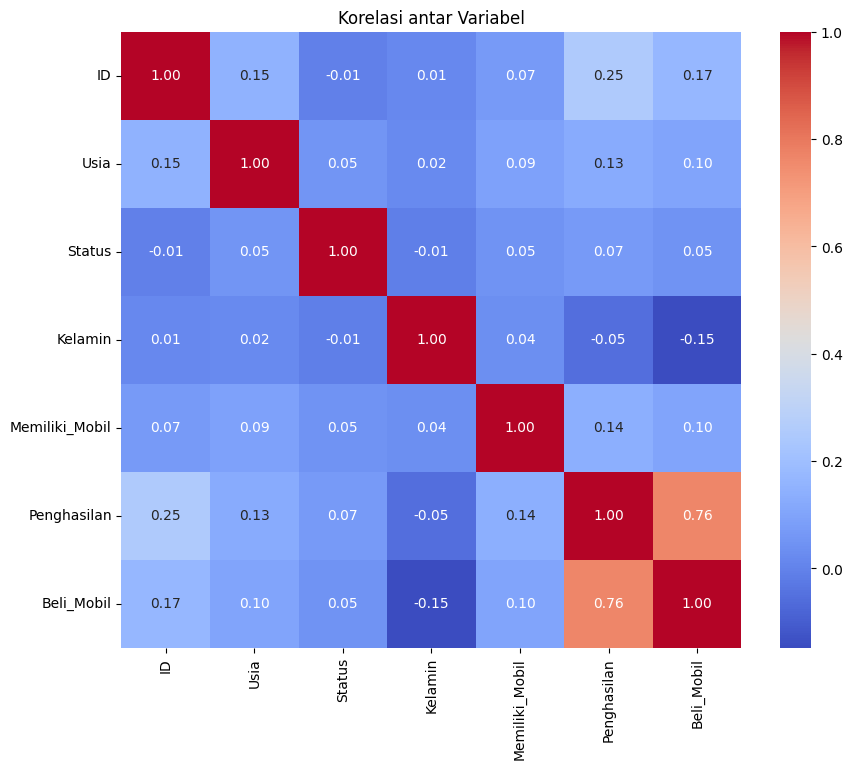

In [22]:
# Cek statistik deskriptif
print("\nStatistik Deskriptif:")
print(df.describe())

# Cek missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Visualisasi distribusi target
plt.figure(figsize=(8, 6))
sns.countplot(x='Beli_Mobil', data=df)
plt.title('Distribusi Target Variable (Beli_Mobil)')
plt.show()

# Korelasi antara fitur
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Korelasi antar Variabel')
plt.show()

In [24]:
# Pisahkan features (X) dan target (y)
X = df.drop(['ID', 'Beli_Mobil'], axis=1)  # Drop ID dan target
y = df['Beli_Mobil']  # Target variable

print("Features:", X.columns.tolist())
print("Target: Beli_Mobil")

# Split data menjadi training dan testing (80:20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nData Training: {X_train.shape[0]} samples")
print(f"Data Testing: {X_test.shape[0]} samples")

Features: ['Usia', 'Status', 'Kelamin', 'Memiliki_Mobil', 'Penghasilan']
Target: Beli_Mobil

Data Training: 800 samples
Data Testing: 200 samples


In [25]:
# Inisialisasi model
model = LogisticRegression(random_state=42, max_iter=1000)

# Train model
model.fit(X_train, y_train)

# Koefisien model
print("Koefisien Model:")
for feature, coef in zip(X.columns, model.coef_[0]):
    print(f"{feature}: {coef:.4f}")

print(f"\nIntercept: {model.intercept_[0]:.4f}")

Koefisien Model:
Usia: -0.0111
Status: -0.1855
Kelamin: -1.2418
Memiliki_Mobil: 0.1324
Penghasilan: 0.0597

Intercept: -11.9291



=== EVALUASI MODEL ===
Akurasi Training: 0.9250 (92.50%)
Akurasi Testing: 0.9400 (94.00%)

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.95      0.92        73
           1       0.97      0.94      0.95       127

    accuracy                           0.94       200
   macro avg       0.93      0.94      0.94       200
weighted avg       0.94      0.94      0.94       200



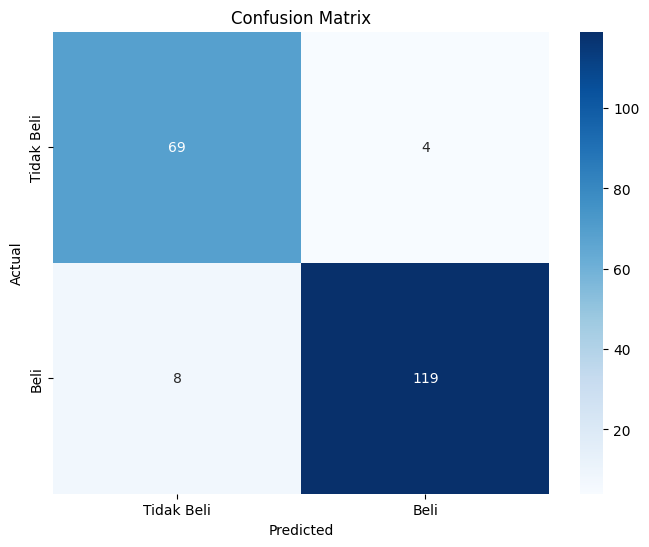

In [26]:
# Prediksi pada data training
y_train_pred = model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Prediksi pada data testing
y_test_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"\n=== EVALUASI MODEL ===")
print(f"Akurasi Training: {train_accuracy:.4f} ({train_accuracy*100:.2f}%)")
print(f"Akurasi Testing: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))

# Confusion Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Tidak Beli', 'Beli'],
            yticklabels=['Tidak Beli', 'Beli'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [27]:
# Buat dataset baru untuk testing
data_baru = pd.DataFrame({
    'Usia': [35, 28, 55, 42, 60, 25],
    'Status': [1, 2, 3, 2, 1, 2],
    'Kelamin': [0, 1, 0, 1, 0, 1],
    'Memiliki_Mobil': [1, 0, 2, 1, 3, 0],
    'Penghasilan': [180, 150, 300, 220, 400, 120]
})

print("Data Baru untuk Prediksi:")
print(data_baru)

# Lakukan prediksi
prediksi_baru = model.predict(data_baru)
probabilitas_baru = model.predict_proba(data_baru)

# Tampilkan hasil prediksi
print("\n=== HASIL PREDIKSI DATA BARU ===")
for i, (pred, prob) in enumerate(zip(prediksi_baru, probabilitas_baru)):
    status = "AKAN BELI" if pred == 1 else "TIDAK BELI"
    prob_beli = prob[1] * 100
    prob_tidak_beli = prob[0] * 100
    print(f"Data {i+1}: {status}")
    print(f"   Probabilitas Beli: {prob_beli:.2f}%")
    print(f"   Probabilitas Tidak Beli: {prob_tidak_beli:.2f}%")
    print("-" * 40)

Data Baru untuk Prediksi:
   Usia  Status  Kelamin  Memiliki_Mobil  Penghasilan
0    35       1        0               1          180
1    28       2        1               0          150
2    55       3        0               2          300
3    42       2        1               1          220
4    60       1        0               3          400
5    25       2        1               0          120

=== HASIL PREDIKSI DATA BARU ===
Data 1: TIDAK BELI
   Probabilitas Beli: 16.43%
   Probabilitas Tidak Beli: 83.57%
----------------------------------------
Data 2: TIDAK BELI
   Probabilitas Beli: 0.74%
   Probabilitas Tidak Beli: 99.26%
----------------------------------------
Data 3: AKAN BELI
   Probabilitas Beli: 99.38%
   Probabilitas Tidak Beli: 0.62%
----------------------------------------
Data 4: TIDAK BELI
   Probabilitas Beli: 32.22%
   Probabilitas Tidak Beli: 67.78%
----------------------------------------
Data 5: AKAN BELI
   Probabilitas Beli: 100.00%
   Probabilitas Tidak


=== FEATURE IMPORTANCE ===
          Feature  Coefficient  Importance
2         Kelamin    -1.241831    1.241831
1          Status    -0.185527    0.185527
3  Memiliki_Mobil     0.132413    0.132413
4     Penghasilan     0.059699    0.059699
0            Usia    -0.011144    0.011144


/tmp/ipython-input-1084025067.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')


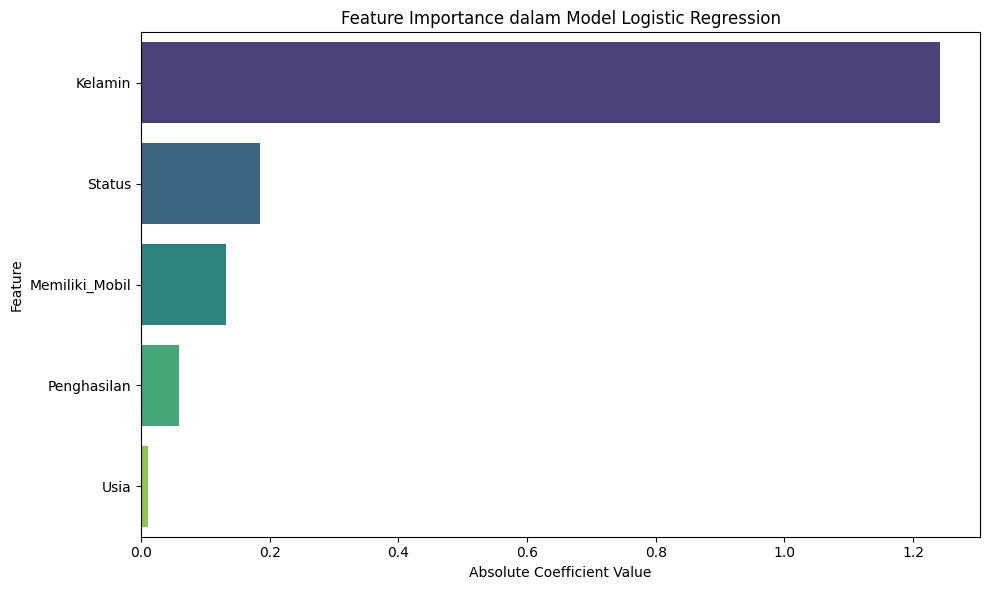

In [28]:
# Feature importance analysis
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0],
    'Importance': np.abs(model.coef_[0])
}).sort_values('Importance', ascending=False)

print("\n=== FEATURE IMPORTANCE ===")
print(feature_importance)

# Visualisasi feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')
plt.title('Feature Importance dalam Model Logistic Regression')
plt.xlabel('Absolute Coefficient Value')
plt.tight_layout()
plt.show()

In [29]:
import joblib

# Simpan model
joblib.dump(model, 'model_logistic_regression_calon_pembeli.pkl')
print("Model berhasil disimpan sebagai 'model_logistic_regression_calon_pembeli.pkl'")

# Simpan juga nama features untuk referensi future
feature_names = X.columns.tolist()
joblib.dump(feature_names, 'feature_names.pkl')
print("Feature names disimpan sebagai 'feature_names.pkl'")

Model berhasil disimpan sebagai 'model_logistic_regression_calon_pembeli.pkl'
Feature names disimpan sebagai 'feature_names.pkl'
